# Nearest Neighbors

In [2]:
%matplotlib inline

------------------

### 01. Simple 1D Kernel Density Estimation

----------------

/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:119: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:120: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


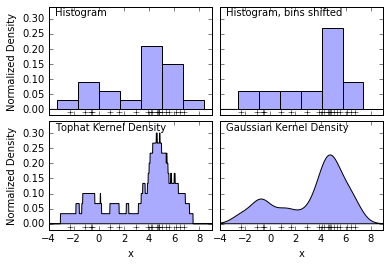

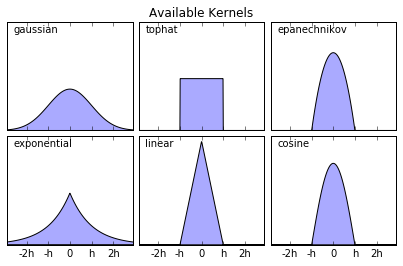

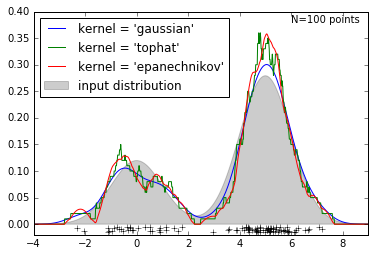

In [11]:
"""
===================================
Simple 1D Kernel Density Estimation
===================================
This example uses the :class:`sklearn.neighbors.KernelDensity` class to
demonstrate the principles of Kernel Density Estimation in one dimension.

The first plot shows one of the problems with using histograms to visualize
the density of points in 1D. Intuitively, a histogram can be thought of as a
scheme in which a unit "block" is stacked above each point on a regular grid.
As the top two panels show, however, the choice of gridding for these blocks
can lead to wildly divergent ideas about the underlying shape of the density
distribution.  If we instead center each block on the point it represents, we
get the estimate shown in the bottom left panel.  This is a kernel density
estimation with a "top hat" kernel.  This idea can be generalized to other
kernel shapes: the bottom-right panel of the first figure shows a Gaussian
kernel density estimate over the same distribution.

Scikit-learn implements efficient kernel density estimation using either
a Ball Tree or KD Tree structure, through the
:class:`sklearn.neighbors.KernelDensity` estimator.  The available kernels
are shown in the second figure of this example.

The third figure compares kernel density estimates for a distribution of 100
samples in 1 dimension.  Though this example uses 1D distributions, kernel
density estimation is easily and efficiently extensible to higher dimensions
as well.
"""
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity


#----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, 0.3 * N),
                    np.random.normal(5, 1, 0.7 * N)))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', normed=True)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', normed=True)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.zeros(X.shape[0]) - 0.01, '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')

#----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

#----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, 0.3 * N),
                    np.random.normal(5, 1, 0.7 * N)))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()


---------------

### 02. Kernel Density Estimate of Species Distributions

--------------

(' - converting', 'coverages/cld6190_ann.asc')
(' - converting', 'coverages/dtr6190_ann.asc')
(' - converting', 'coverages/ecoreg.asc')
(' - converting', 'coverages/frs6190_ann.asc')
(' - converting', 'coverages/h_dem.asc')
(' - converting', 'coverages/pre6190_ann.asc')
(' - converting', 'coverages/pre6190_l1.asc')
(' - converting', 'coverages/pre6190_l10.asc')
(' - converting', 'coverages/pre6190_l4.asc')
(' - converting', 'coverages/pre6190_l7.asc')
(' - converting', 'coverages/tmn6190_ann.asc')
(' - converting', 'coverages/tmp6190_ann.asc')
(' - converting', 'coverages/tmx6190_ann.asc')
(' - converting', 'coverages/vap6190_ann.asc')
 - computing KDE in spherical coordinates
 - plot coastlines from coverage
 - computing KDE in spherical coordinates
 - plot coastlines from coverage


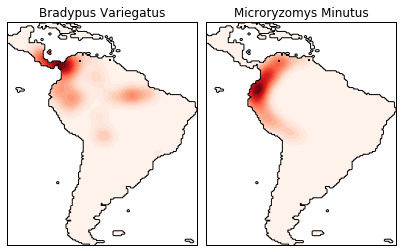

In [12]:
"""
================================================
Kernel Density Estimate of Species Distributions
================================================
This shows an example of a neighbors-based query (in particular a kernel
density estimate) on geospatial data, using a Ball Tree built upon the
Haversine distance metric -- i.e. distances over points in latitude/longitude.
The dataset is provided by Phillips et. al. (2006).
If available, the example uses
`basemap <http://matplotlib.sourceforge.net/basemap/doc/html/>`_
to plot the coast lines and national boundaries of South America.

This example does not perform any learning over the data
(see :ref:`example_applications_plot_species_distribution_modeling.py` for
an example of classification based on the attributes in this dataset).  It
simply shows the kernel density estimate of observed data points in
geospatial coordinates.

The two species are:

 - `"Bradypus variegatus"
   <http://www.iucnredlist.org/apps/redlist/details/3038/0>`_ ,
   the Brown-throated Sloth.

 - `"Microryzomys minutus"
   <http://www.iucnredlist.org/apps/redlist/details/13408/0>`_ ,
   also known as the Forest Small Rice Rat, a rodent that lives in Peru,
   Colombia, Ecuador, Peru, and Venezuela.

References
----------

 * `"Maximum entropy modeling of species geographic distributions"
   <http://www.cs.princeton.edu/~schapire/papers/ecolmod.pdf>`_
   S. J. Phillips, R. P. Anderson, R. E. Schapire - Ecological Modelling,
   190:231-259, 2006.
"""
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_species_distributions
from sklearn.datasets.species_distributions import construct_grids
from sklearn.neighbors import KernelDensity

# if basemap is available, we'll use it.
# otherwise, we'll improvise later...
try:
    from mpl_toolkits.basemap import Basemap
    basemap = True
except ImportError:
    basemap = False

# Get matrices/arrays of species IDs and locations
data = fetch_species_distributions()
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']

Xtrain = np.vstack([data['train']['dd lat'],
                    data['train']['dd long']]).T
ytrain = np.array([d.decode('ascii').startswith('micro')
                  for d in data['train']['species']], dtype='int')
Xtrain *= np.pi / 180.  # Convert lat/long to radians

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()

xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.

# Plot map of South America with distributions of each species
fig = plt.figure()
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

for i in range(2):
    plt.subplot(1, 2, i + 1)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(bandwidth=0.04, metric='haversine',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = -9999 + np.zeros(land_mask.shape[0])
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

    if basemap:
        print(" - plot coastlines using basemap")
        m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                    urcrnrlat=Y.max(), llcrnrlon=X.min(),
                    urcrnrlon=X.max(), resolution='c')
        m.drawcoastlines()
        m.drawcountries()
    else:
        print(" - plot coastlines from coverage")
        plt.contour(X, Y, land_reference,
                    levels=[-9999], colors="k",
                    linestyles="solid")
        plt.xticks([])
        plt.yticks([])

    plt.title(species_names[i])

plt.show()


-----------------

### 03. Kernel Density Estimation

----------------

In [14]:
"""
=========================
Kernel Density Estimation
=========================

This example shows how kernel density estimation (KDE), a powerful
non-parametric density estimation technique, can be used to learn
a generative model for a dataset.  With this generative model in place,
new samples can be drawn.  These new samples reflect the underlying model
of the data.
"""

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
#from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import GridSearchCV

# load the data
digits = load_digits()
data = digits.data

# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()


ImportError: cannot import name GridSearchCV

### 02. Kernel Density Estimate of Species Distributions

----------------

In [ ]:
"""
================================================
Kernel Density Estimate of Species Distributions
================================================
This shows an example of a neighbors-based query (in particular a kernel
density estimate) on geospatial data, using a Ball Tree built upon the
Haversine distance metric -- i.e. distances over points in latitude/longitude.
The dataset is provided by Phillips et. al. (2006).
If available, the example uses
`basemap <http://matplotlib.sourceforge.net/basemap/doc/html/>`_
to plot the coast lines and national boundaries of South America.

This example does not perform any learning over the data
(see :ref:`example_applications_plot_species_distribution_modeling.py` for
an example of classification based on the attributes in this dataset).  It
simply shows the kernel density estimate of observed data points in
geospatial coordinates.

The two species are:

 - `"Bradypus variegatus"
   <http://www.iucnredlist.org/apps/redlist/details/3038/0>`_ ,
   the Brown-throated Sloth.

 - `"Microryzomys minutus"
   <http://www.iucnredlist.org/apps/redlist/details/13408/0>`_ ,
   also known as the Forest Small Rice Rat, a rodent that lives in Peru,
   Colombia, Ecuador, Peru, and Venezuela.

References
----------

 * `"Maximum entropy modeling of species geographic distributions"
   <http://www.cs.princeton.edu/~schapire/papers/ecolmod.pdf>`_
   S. J. Phillips, R. P. Anderson, R. E. Schapire - Ecological Modelling,
   190:231-259, 2006.
"""
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_species_distributions
from sklearn.datasets.species_distributions import construct_grids
from sklearn.neighbors import KernelDensity

# if basemap is available, we'll use it.
# otherwise, we'll improvise later...
try:
    from mpl_toolkits.basemap import Basemap
    basemap = True
except ImportError:
    basemap = False

# Get matrices/arrays of species IDs and locations
data = fetch_species_distributions()
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']

Xtrain = np.vstack([data['train']['dd lat'],
                    data['train']['dd long']]).T
ytrain = np.array([d.decode('ascii').startswith('micro')
                  for d in data['train']['species']], dtype='int')
Xtrain *= np.pi / 180.  # Convert lat/long to radians

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()

xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.

# Plot map of South America with distributions of each species
fig = plt.figure()
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

for i in range(2):
    plt.subplot(1, 2, i + 1)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(bandwidth=0.04, metric='haversine',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = -9999 + np.zeros(land_mask.shape[0])
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

    if basemap:
        print(" - plot coastlines using basemap")
        m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                    urcrnrlat=Y.max(), llcrnrlon=X.min(),
                    urcrnrlon=X.max(), resolution='c')
        m.drawcoastlines()
        m.drawcountries()
    else:
        print(" - plot coastlines from coverage")
        plt.contour(X, Y, land_reference,
                    levels=[-9999], colors="k",
                    linestyles="solid")
        plt.xticks([])
        plt.yticks([])

    plt.title(species_names[i])

plt.show()


### 1. Nearest Neighbors Classification

-----------------


Nearest Neighbors Classification

Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.



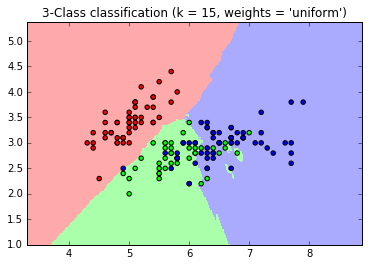

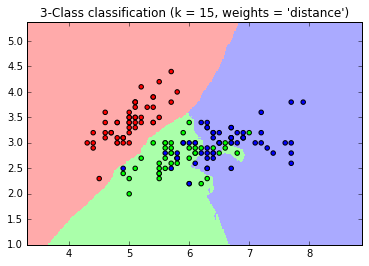

In [3]:
"""
================================
Nearest Neighbors Classification
================================

Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


---------

### 2. Nearest Neighbors regression

---------------

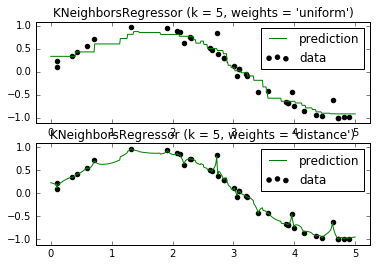

In [4]:
"""
============================
Nearest Neighbors regression
============================

Demonstrate the resolution of a regression problem
using a k-Nearest Neighbor and the interpolation of the
target using both barycenter and constant weights.

"""
#print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Fabian Pedregosa <fabian.pedregosa@inria.fr>
#
# License: BSD 3 clause (C) INRIA


###############################################################################
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

###############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()


------------

### 3. Face completion with a multi-output estimators

---------------


Face completion with a multi-output estimators

This example shows the use of multi-output estimator to complete images.
The goal is to predict the lower half of a face given its upper half.

The first column of images shows true faces. The next columns illustrate
how extremely randomized trees, k nearest neighbors, linear
regression and ridge regression complete the lower half of those faces.




/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


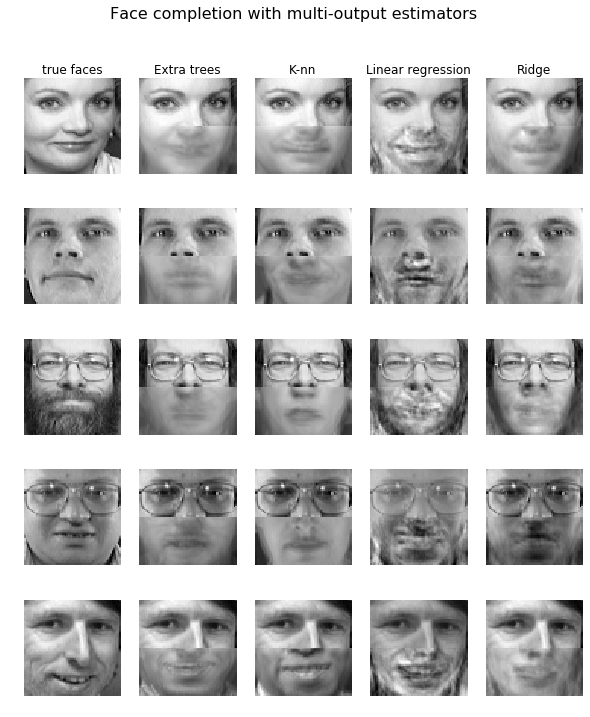

In [5]:
"""
==============================================
Face completion with a multi-output estimators
==============================================

This example shows the use of multi-output estimator to complete images.
The goal is to predict the lower half of a face given its upper half.

The first column of images shows true faces. The next columns illustrate
how extremely randomized trees, k nearest neighbors, linear
regression and ridge regression complete the lower half of those faces.

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
X_train = train[:, :np.ceil(0.5 * n_pixels)]  # Upper half of the faces
y_train = train[:, np.floor(0.5 * n_pixels):]  # Lower half of the faces
X_test = test[:, :np.ceil(0.5 * n_pixels)]
y_test = test[:, np.floor(0.5 * n_pixels):]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")


    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()


-----------

### 4. Nearest Centroid Classification

----------------


Nearest Centroid Classification

Sample usage of Nearest Centroid classification.
It will plot the decision boundaries for each class.

(None, 0.81333333333333335)
(0.2, 0.81999999999999995)


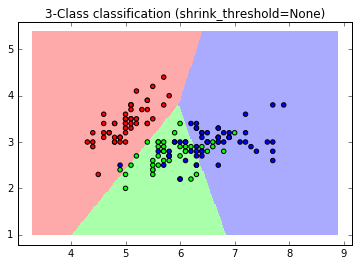

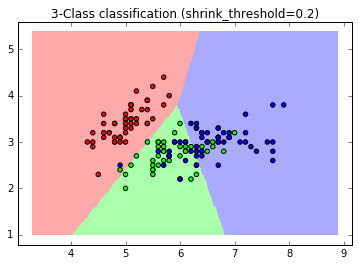

In [7]:
"""
===============================
Nearest Centroid Classification
===============================

Sample usage of Nearest Centroid classification.
It will plot the decision boundaries for each class.
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for shrinkage in [None, .2]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.title("3-Class classification (shrink_threshold=%r)"
              % shrinkage)
    plt.axis('tight')

plt.show()


-------------------

### 5. Hyper-parameters of Approximate Nearest Neighbors

----------------------


Hyper-parameters of Approximate Nearest Neighbors

This example demonstrates the behaviour of the
accuracy of the nearest neighbor queries of Locality Sensitive Hashing
Forest as the number of candidates and the number of estimators (trees)
vary.

In the first plot, accuracy is measured with the number of candidates. Here,
the term "number of candidates" refers to maximum bound for the number of
distinct points retrieved from each tree to calculate the distances. Nearest
neighbors are selected from this pool of candidates. Number of estimators is
maintained at three fixed levels (1, 5, 10).

In the second plot, the number of candidates is fixed at 50. Number of trees
is varied and the accuracy is plotted against those values. To measure the
accuracy, the true nearest neighbors are required, therefore
:class:`sklearn.neighbors.NearestNeighbors` is used to compute the exact
neighbors.



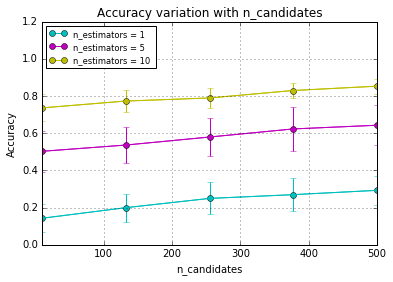

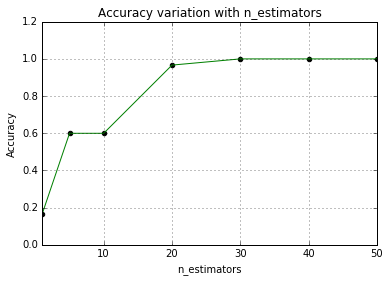

In [8]:
"""
=================================================
Hyper-parameters of Approximate Nearest Neighbors
=================================================

This example demonstrates the behaviour of the
accuracy of the nearest neighbor queries of Locality Sensitive Hashing
Forest as the number of candidates and the number of estimators (trees)
vary.

In the first plot, accuracy is measured with the number of candidates. Here,
the term "number of candidates" refers to maximum bound for the number of
distinct points retrieved from each tree to calculate the distances. Nearest
neighbors are selected from this pool of candidates. Number of estimators is
maintained at three fixed levels (1, 5, 10).

In the second plot, the number of candidates is fixed at 50. Number of trees
is varied and the accuracy is plotted against those values. To measure the
accuracy, the true nearest neighbors are required, therefore
:class:`sklearn.neighbors.NearestNeighbors` is used to compute the exact
neighbors.
"""
from __future__ import division
print(__doc__)

# Author: Maheshakya Wijewardena <maheshakya.10@cse.mrt.ac.lk>
#
# License: BSD 3 clause


###############################################################################
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import LSHForest
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


# Initialize size of the database, iterations and required neighbors.
n_samples = 10000
n_features = 100
n_queries = 30
rng = np.random.RandomState(42)

# Generate sample data
X, _ = make_blobs(n_samples=n_samples + n_queries,
                  n_features=n_features, centers=10,
                  random_state=0)
X_index = X[:n_samples]
X_query = X[n_samples:]
# Get exact neighbors
nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute',
                        metric='cosine').fit(X_index)
neighbors_exact = nbrs.kneighbors(X_query, return_distance=False)

# Set `n_candidate` values
n_candidates_values = np.linspace(10, 500, 5).astype(np.int)
n_estimators_for_candidate_value = [1, 5, 10]
n_iter = 10
stds_accuracies = np.zeros((len(n_estimators_for_candidate_value),
                            n_candidates_values.shape[0]),
                           dtype=float)
accuracies_c = np.zeros((len(n_estimators_for_candidate_value),
                         n_candidates_values.shape[0]), dtype=float)

# LSH Forest is a stochastic index: perform several iteration to estimate
# expected accuracy and standard deviation displayed as error bars in
# the plots
for j, value in enumerate(n_estimators_for_candidate_value):
    for i, n_candidates in enumerate(n_candidates_values):
        accuracy_c = []
        for seed in range(n_iter):
            lshf = LSHForest(n_estimators=value,
                             n_candidates=n_candidates, n_neighbors=1,
                             random_state=seed)
            # Build the LSH Forest index
            lshf.fit(X_index)
            # Get neighbors
            neighbors_approx = lshf.kneighbors(X_query,
                                               return_distance=False)
            accuracy_c.append(np.sum(np.equal(neighbors_approx,
                                              neighbors_exact)) /
                              n_queries)

        stds_accuracies[j, i] = np.std(accuracy_c)
        accuracies_c[j, i] = np.mean(accuracy_c)

# Set `n_estimators` values
n_estimators_values = [1, 5, 10, 20, 30, 40, 50]
accuracies_trees = np.zeros(len(n_estimators_values), dtype=float)

# Calculate average accuracy for each value of `n_estimators`
for i, n_estimators in enumerate(n_estimators_values):
    lshf = LSHForest(n_estimators=n_estimators, n_neighbors=1)
    # Build the LSH Forest index
    lshf.fit(X_index)
    # Get neighbors
    neighbors_approx = lshf.kneighbors(X_query, return_distance=False)
    accuracies_trees[i] = np.sum(np.equal(neighbors_approx,
                                          neighbors_exact))/n_queries

###############################################################################
# Plot the accuracy variation with `n_candidates`
plt.figure()
colors = ['c', 'm', 'y']
for i, n_estimators in enumerate(n_estimators_for_candidate_value):
    label = 'n_estimators = %d ' % n_estimators
    plt.plot(n_candidates_values, accuracies_c[i, :],
             'o-', c=colors[i], label=label)
    plt.errorbar(n_candidates_values, accuracies_c[i, :],
                 stds_accuracies[i, :], c=colors[i])

plt.legend(loc='upper left', prop=dict(size='small'))
plt.ylim([0, 1.2])
plt.xlim(min(n_candidates_values), max(n_candidates_values))
plt.ylabel("Accuracy")
plt.xlabel("n_candidates")
plt.grid(which='both')
plt.title("Accuracy variation with n_candidates")

# Plot the accuracy variation with `n_estimators`
plt.figure()
plt.scatter(n_estimators_values, accuracies_trees, c='k')
plt.plot(n_estimators_values, accuracies_trees, c='g')
plt.ylim([0, 1.2])
plt.xlim(min(n_estimators_values), max(n_estimators_values))
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.grid(which='both')
plt.title("Accuracy variation with n_estimators")

plt.show()


--------------

### 6. Scalability of Approximate Nearest Neighbors

---------------

Index size: 1000, exact: 0.001s, LSHF: 0.010s, speedup: 0.1, accuracy: 1.00 +/-0.00
Index size: 2511, exact: 0.003s, LSHF: 0.010s, speedup: 0.3, accuracy: 1.00 +/-0.00
Index size: 6309, exact: 0.008s, LSHF: 0.012s, speedup: 0.6, accuracy: 1.00 +/-0.00
Index size: 15848, exact: 0.018s, LSHF: 0.012s, speedup: 1.5, accuracy: 1.00 +/-0.00
Index size: 39810, exact: 0.046s, LSHF: 0.014s, speedup: 3.3, accuracy: 0.98 +/-0.04
Index size: 100000, exact: 0.129s, LSHF: 0.021s, speedup: 5.9, accuracy: 0.92 +/-0.07


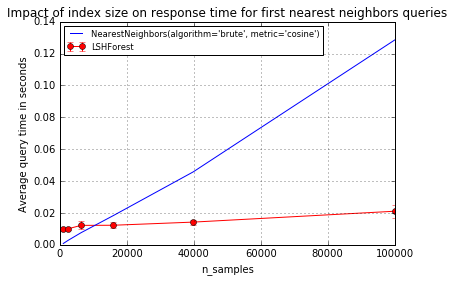

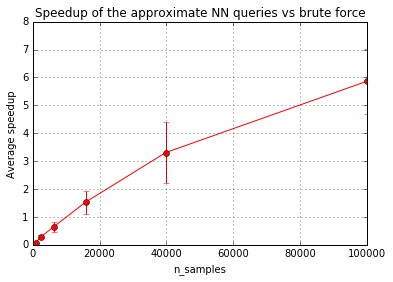

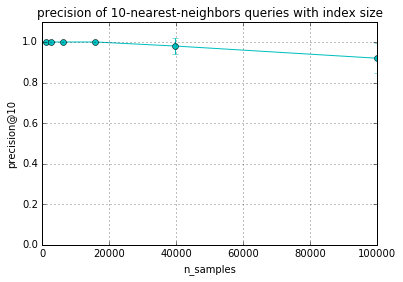

In [9]:
"""
============================================
Scalability of Approximate Nearest Neighbors
============================================

This example studies the scalability profile of approximate 10-neighbors
queries using the LSHForest with ``n_estimators=20`` and ``n_candidates=200``
when varying the number of samples in the dataset.

The first plot demonstrates the relationship between query time and index size
of LSHForest. Query time is compared with the brute force method in exact
nearest neighbor search for the same index sizes. The brute force queries have a
very predictable linear scalability with the index (full scan). LSHForest index
have sub-linear scalability profile but can be slower for small datasets.

The second plot shows the speedup when using approximate queries vs brute force
exact queries. The speedup tends to increase with the dataset size but should
reach a plateau typically when doing queries on datasets with millions of
samples and a few hundreds of dimensions. Higher dimensional datasets tends to
benefit more from LSHForest indexing.

The break even point (speedup = 1) depends on the dimensionality and structure
of the indexed data and the parameters of the LSHForest index.

The precision of approximate queries should decrease slowly with the dataset
size. The speed of the decrease depends mostly on the LSHForest parameters and
the dimensionality of the data.

"""
from __future__ import division
#print(__doc__)

# Authors: Maheshakya Wijewardena <maheshakya.10@cse.mrt.ac.lk>
#          Olivier Grisel <olivier.grisel@ensta.org>
#
# License: BSD 3 clause


###############################################################################
import time
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import LSHForest
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Parameters of the study
n_samples_min = int(1e3)
n_samples_max = int(1e5)
n_features = 100
n_centers = 100
n_queries = 100
n_steps = 6
n_iter = 5

# Initialize the range of `n_samples`
n_samples_values = np.logspace(np.log10(n_samples_min),
                               np.log10(n_samples_max),
                               n_steps).astype(np.int)

# Generate some structured data
rng = np.random.RandomState(42)
all_data, _ = make_blobs(n_samples=n_samples_max + n_queries,
                         n_features=n_features, centers=n_centers, shuffle=True,
                         random_state=0)
queries = all_data[:n_queries]
index_data = all_data[n_queries:]

# Metrics to collect for the plots
average_times_exact = []
average_times_approx = []
std_times_approx = []
accuracies = []
std_accuracies = []
average_speedups = []
std_speedups = []

# Calculate the average query time
for n_samples in n_samples_values:
    X = index_data[:n_samples]
    # Initialize LSHForest for queries of a single neighbor
    lshf = LSHForest(n_estimators=20, n_candidates=200,
                     n_neighbors=10).fit(X)
    nbrs = NearestNeighbors(algorithm='brute', metric='cosine',
                            n_neighbors=10).fit(X)
    time_approx = []
    time_exact = []
    accuracy = []

    for i in range(n_iter):
        # pick one query at random to study query time variability in LSHForest
        query = queries[[rng.randint(0, n_queries)]]

        t0 = time.time()
        exact_neighbors = nbrs.kneighbors(query, return_distance=False)
        time_exact.append(time.time() - t0)

        t0 = time.time()
        approx_neighbors = lshf.kneighbors(query, return_distance=False)
        time_approx.append(time.time() - t0)

        accuracy.append(np.in1d(approx_neighbors, exact_neighbors).mean())

    average_time_exact = np.mean(time_exact)
    average_time_approx = np.mean(time_approx)
    speedup = np.array(time_exact) / np.array(time_approx)
    average_speedup = np.mean(speedup)
    mean_accuracy = np.mean(accuracy)
    std_accuracy = np.std(accuracy)
    print("Index size: %d, exact: %0.3fs, LSHF: %0.3fs, speedup: %0.1f, "
          "accuracy: %0.2f +/-%0.2f" %
          (n_samples, average_time_exact, average_time_approx, average_speedup,
           mean_accuracy, std_accuracy))

    accuracies.append(mean_accuracy)
    std_accuracies.append(std_accuracy)
    average_times_exact.append(average_time_exact)
    average_times_approx.append(average_time_approx)
    std_times_approx.append(np.std(time_approx))
    average_speedups.append(average_speedup)
    std_speedups.append(np.std(speedup))

# Plot average query time against n_samples
plt.figure()
plt.errorbar(n_samples_values, average_times_approx, yerr=std_times_approx,
             fmt='o-', c='r', label='LSHForest')
plt.plot(n_samples_values, average_times_exact, c='b',
         label="NearestNeighbors(algorithm='brute', metric='cosine')")
plt.legend(loc='upper left', prop=dict(size='small'))
plt.ylim(0, None)
plt.ylabel("Average query time in seconds")
plt.xlabel("n_samples")
plt.grid(which='both')
plt.title("Impact of index size on response time for first "
          "nearest neighbors queries")

# Plot average query speedup versus index size
plt.figure()
plt.errorbar(n_samples_values, average_speedups, yerr=std_speedups,
             fmt='o-', c='r')
plt.ylim(0, None)
plt.ylabel("Average speedup")
plt.xlabel("n_samples")
plt.grid(which='both')
plt.title("Speedup of the approximate NN queries vs brute force")

# Plot average precision versus index size
plt.figure()
plt.errorbar(n_samples_values, accuracies, std_accuracies, fmt='o-', c='c')
plt.ylim(0, 1.1)
plt.ylabel("precision@10")
plt.xlabel("n_samples")
plt.grid(which='both')
plt.title("precision of 10-nearest-neighbors queries with index size")

plt.show()
